In [23]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DADOS_AEPS = '../dataset/aeps-prev.xlsx'

In [8]:
aeps = pd.read_excel(DADOS_AEPS, sheet_name='aeps')
prev_ddb = pd.read_excel(DADOS_AEPS, sheet_name='prev-ddb')
prev_dib = pd.read_excel(DADOS_AEPS, sheet_name='prev-dib')

## **AEPS vs PREV**
### **1. Erro Total**

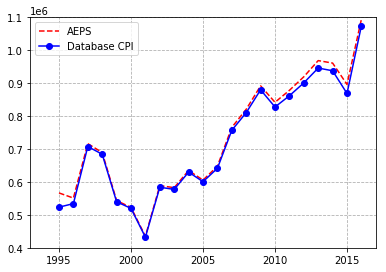

In [9]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(aeps['ano'], aeps['total'], 'r--', label='AEPS')
axes.plot(prev_ddb['ano'], prev_ddb['total'], 'b-o', label="Prev")
axes.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
plt.ylim(0.4*1e6, 1.1*1e6)
plt.grid(linestyle='--')
axes.legend(['AEPS', 'Database CPI'])

plt.savefig('aepsvsprev.png', dpi=800)

In [10]:
err = aeps['total'] - prev_ddb['total']
err_p = (abs(prev_ddb['total'] - aeps['total']) * 100) / prev_ddb['total']

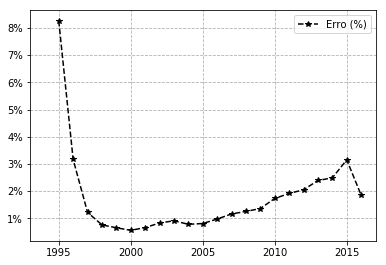

In [33]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(aeps['ano'], err_p, 'k--*', label='AEPS')
axes.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
plt.grid(linestyle='--')
axes.legend(['Erro (%)'])

axes.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# plt.savefig('err.png', dpi=800)

### **2. Erro Clientela**

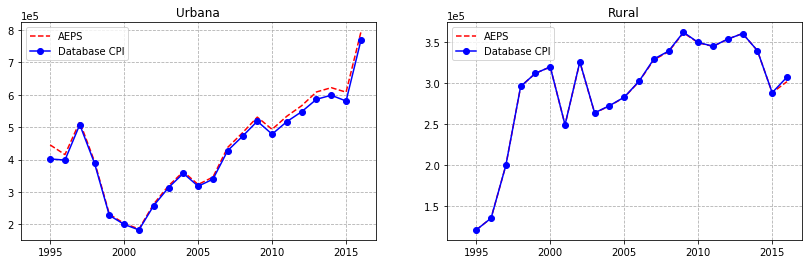

In [50]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(14,4))

# Add set of axes to figure
axes = fig.add_axes([0.8, 0.8, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

plt.subplot(121)
# Plot on that set of axes
plt.plot(aeps['ano'], aeps['urb-total'], 'r--', label='AEPS')
plt.plot(prev_ddb['ano'], prev_ddb['urb-total'], 'b-o', label="Prev")
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
#plt.ylim(0.4*1e6, 1.1*1e6)
plt.grid(linestyle='--')
plt.legend(['AEPS', 'Database CPI'])
plt.title('Urbana')

plt.subplot(122)
# Plot on that set of axes
plt.plot(aeps['ano'], aeps['rur-total'], 'r--', label='AEPS')
plt.plot(prev_ddb['ano'], prev_ddb['rur-total'], 'b-o', label="Prev")
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
#plt.ylim(0.4*1e6, 1.1*1e6)
plt.grid(linestyle='--')
plt.legend(['AEPS', 'Database CPI'])
plt.title('Rural')
#plt.savefig('aepsvsprev.png', dpi=800)

plt.show()

In [51]:
err = aeps['urb-total'] - prev_ddb['urb-total']
err_u = (abs(prev_ddb['urb-total'] - aeps['urb-total']) * 100) / prev_ddb['urb-total']

err = aeps['rur-total'] - prev_ddb['rur-total']
err_r = (abs(prev_ddb['rur-total'] - aeps['rur-total']) * 100) / prev_ddb['rur-total']

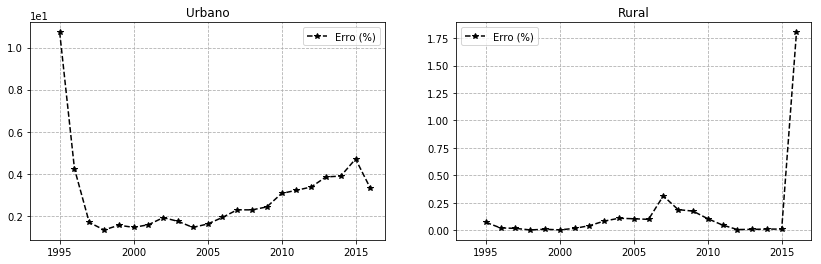

In [66]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(14,4))

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

plt.subplot(121)
# Plot on that set of axes
plt.plot(aeps['ano'], err_u, 'k--*', label='AEPS')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
plt.grid(linestyle='--')
plt.legend(['Erro (%)'])
plt.title('Urbano')

plt.subplot(122)
# Plot on that set of axes
plt.plot(aeps['ano'], err_r, 'k--*', label='AEPS')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
plt.grid(linestyle='--')
plt.legend(['Erro (%)'])
plt.title('Rural')

plt.show()

### **3. Erro Tipo de Benefício**

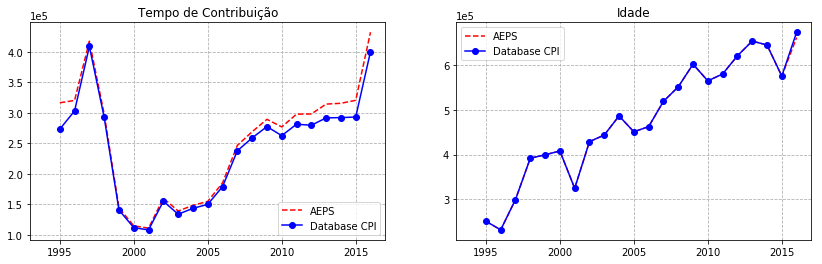

In [73]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(14,4))

# Add set of axes to figure
axes = fig.add_axes([0.8, 0.8, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

plt.subplot(121)
# Plot on that set of axes
plt.plot(aeps['ano'], (aeps['urb-tc'] + aeps['rur-tc']), 'r--', label='AEPS')
plt.plot(prev_ddb['ano'], (prev_ddb['urb-tc']+prev_ddb['rur-tc']), 'b-o', label="Prev")
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
#plt.ylim(0.4*1e6, 1.1*1e6)
plt.grid(linestyle='--')
plt.legend(['AEPS', 'Database CPI'])
plt.title('Tempo de Contribuição')

plt.subplot(122)
# Plot on that set of axes
plt.plot(aeps['ano'], (aeps['urb-id'] + aeps['rur-id']), 'r--', label='AEPS')
plt.plot(prev_ddb['ano'], (prev_ddb['urb-id']+prev_ddb['rur-id']), 'b-o', label="Prev")
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
#plt.ylim(0.4*1e6, 1.1*1e6)
plt.grid(linestyle='--')
plt.legend(['AEPS', 'Database CPI'])
plt.title('Idade')
#plt.savefig('aepsvsprev.png', dpi=800)

plt.show()

In [74]:
tc_aeps = (aeps['urb-tc'] + aeps['rur-tc'])
tc_prev = (prev_ddb['urb-tc'] + prev_ddb['rur-tc'])

id_aeps = (aeps['urb-id'] + aeps['rur-id'])
id_prev = (prev_ddb['urb-id'] + prev_ddb['rur-id'])

err = tc_aeps - tc_prev
err_tc = (abs(tc_prev - tc_aeps) * 100) / tc_prev

err = id_aeps - id_prev
err_id = (abs(id_prev - id_aeps) * 100) / id_prev

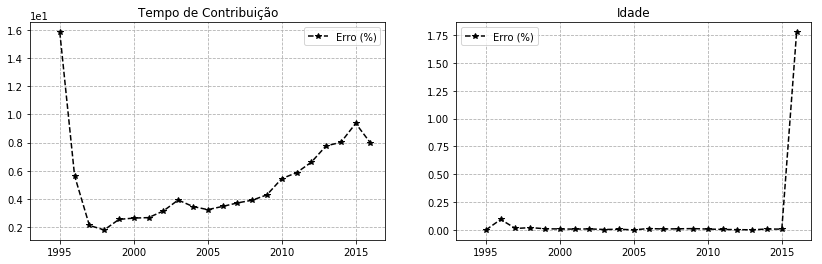

In [75]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(14,4))

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

plt.subplot(121)
# Plot on that set of axes
plt.plot(aeps['ano'], err_tc, 'k--*', label='AEPS')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
plt.grid(linestyle='--')
plt.legend(['Erro (%)'])
plt.title('Tempo de Contribuição')

plt.subplot(122)
# Plot on that set of axes
plt.plot(aeps['ano'], err_id, 'k--*', label='AEPS')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
plt.grid(linestyle='--')
plt.legend(['Erro (%)'])
plt.title('Idade')

plt.show()

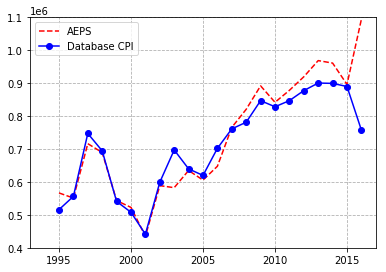

In [76]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(aeps['ano'], aeps['total'], 'r--', label='AEPS')
axes.plot(prev_dib['ano'], prev_dib['total'], 'b-o', label="Prev")
axes.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
plt.ylim(0.4*1e6, 1.1*1e6)
plt.grid(linestyle='--')
axes.legend(['AEPS', 'Database CPI'])

plt.savefig('aepsvsprev.png', dpi=800)

In [79]:
err = aeps['total'] - prev_dib['total']
err_p = (abs(prev_dib['total'] - aeps['total']) * 100) / prev_dib['total']

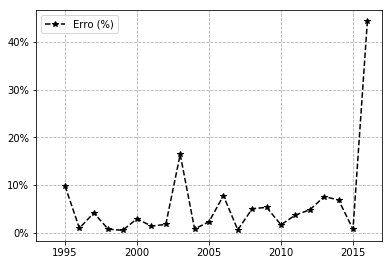

In [80]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(aeps['ano'], err_p, 'k--*', label='AEPS')
axes.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlim(1993, 2017)
plt.grid(linestyle='--')
axes.legend(['Erro (%)'])

axes.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# plt.savefig('err.png', dpi=800)